In [355]:
import os
import pandas as pd

def get_file_names(input_directory):
    result_list = []
    for file_name in os.listdir(input_directory):
        if file_name.endswith(".csv"):
            result_list.append(file_name)
    return result_list


def get_data(input_directory, file_list):
    df_list=[] 
    outdata = pd.DataFrame()
    for file_name in file_list:
        path = input_directory + "/" + file_name
        data = pd.read_csv(path)
        data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

        df_list.append(data)
    return df_list

dir_name = 'for_wordCloud_use'
df_list = get_data(dir_name, get_file_names(dir_name))


In [8]:
# fucntion to turn a df (of one day) into wordclouds
def df_to_two_wordclouds(df):
    wc_yes_like, wc_no_like, wc_all, wc_pos, wc_neg, wc_neu = df_to_three_wordcloud(df, stop_list,100,'2020-03-02')
    
    eng_wordcloud(eng_freq_list)
    
    ch_wc_to_en_wc(wc_list,date,threshold)

In [292]:
import jieba.analyse
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import jieba

df = df_list[0]
word_list = []
for df in df_list:
    l = df.content.tolist()
    l = ' '.join(l)

    tags = jieba.analyse.extract_tags(l, topK=1000, withWeight=True)
    freq_dict = dict(tags)
    
    new_word_list = [a_tuple[0] for a_tuple in tags]
    
    word_list= list(set(word_list) | set(new_word_list))


In [149]:
df = df_list[0]
l = df.content.tolist()
l = ' '.join(l)

tags = jieba.analyse.extract_tags(l, topK=1000, withWeight=True)


res = jieba.cut(l)
res_text = ''.join(res)
# background_img = plt.imread('bg.jpg')
stop_list = ['新型','肺炎','新冠','冠状病毒','展开','全文','什么']
for w in stop_list:
    if w not in STOPWORDS:
        STOPWORDS.add(w)
        
        
freq_dict = dict(tags)
for stop_word in stop_list:
    if stop_word in freq_dict.keys():
        del freq_dict[str(stop_word)]

In [11]:
import random

# two color functions to change wordcloud color scheme
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=3):
        h  = random.randint(50,80)
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * float(random.randint(100, 130)) / 255.0)
        return "hsl({}, {}%, {}%)".format(h, s, l)

# 0-30 red
# 30-60 yellow
# 60-90 green
def my_tf_color_func(dictionary):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in list(freq_dict.keys())[:3]:
            return "hsl(%d, 90%%, 50%%)" % (20* dictionary[word])
        elif word in list(freq_dict.keys())[3:20]:
            return "hsl(%d, 90%%, 50%%)" % (1000* dictionary[word])
        else:
            return "hsl(%d, 90%%, 50%%)" % (12000* dictionary[word])
    return my_tf_color_func_inner

In [12]:
print(random_color_func())
print(my_tf_color_func(freq_dict))
int(100.0 * 255.0 / 255.0)

hsl(64, 100%, 50%)
<function my_tf_color_func.<locals>.my_tf_color_func_inner at 0x114b87f80>


100

In [36]:
import numpy as np

background_img = plt.imread('cloud.jpg')
my_dpi = 0.1
wc = WordCloud(background_color="white",stopwords=STOPWORDS, width=800,height=800, color_func = my_tf_color_func(freq_dict),mask=background_img,font_path='SourceHanSerifK-Light.otf').generate_from_frequencies(freq_dict)

# wc.words_

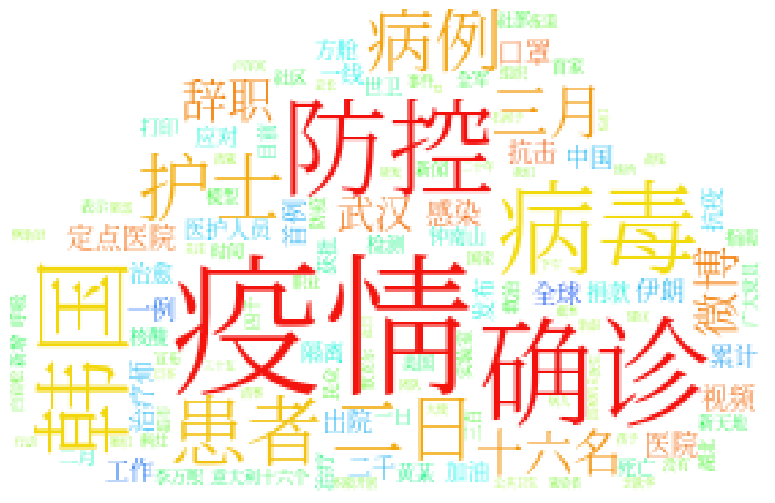

In [37]:
plt.figure(figsize = (16,9))
plt.imshow(wc)
plt.axis('off')
plt.show()

## wordcloud based on label (positive/negative/neutral)

In [31]:
df.head()

,id,label,keyword,date,content,time,forward,comment,like
0,1,__label__negative,新冠,2020-03-02,口罩 口罩 正确 戴法 看到 还是 有 很多 路 人 没有 正确 佩戴 捉急 广西 连续 六...,2020-03-02 22:59:00,0,0,0
1,2,__label__negative,新冠,2020-03-02,哪来 的,2020-03-02 22:12:00,0,0,0
2,3,__label__positive,新冠,2020-03-02,微博 辟谣 谣言 安宫 牛黄丸 可 预防 新冠肺,2020-03-02 15:25:00,7,6,17
3,4,__label__neutral,新冠,2020-03-02,二千 零 二十万 零 三百 零二 太 压抑 了 转 钟南山 讲述 武汉 有 一三人 小家庭 ...,2020-03-02 22:59:00,0,0,0
4,5,__label__positive,新冠,2020-03-02,这么 对比 各国 官僚 行动 步骤 如果 这次 新冠 发生 在 其他 国家 即便 是 日 美...,2020-03-02 11:52:00,0,0,0


In [66]:
# separate df into two dfs according to their number of forward/comment/like
df_yes_like = df[(df['forward'] > 5) | (df['comment'] > 5) | (df['like'] > 5)]
df_no_like = df[~df.index.isin(df_yes_like.index)]

In [32]:
# separate df into three dfs according to their lables
df_pos = df[df['label'] == '__label__positive']
df_neg = df[df['label'] == '__label__negative']
df_neu = df[df['label'] == '__label__neutral']

In [139]:
import jieba.analyse
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import jieba

def freq_dict_to_wordcloud(freq_dict):

    background_img = plt.imread('cloud.jpg')
    my_dpi = 0.1
    wc = WordCloud(background_color="white",stopwords=STOPWORDS, width=800,height=800, color_func = my_tf_color_func(freq_dict),mask=background_img,font_path='SourceHanSerifK-Light.otf').generate_from_frequencies(freq_dict)
    
    return wc

# function to generate english wordcloud from a frequency dict
def eng_wordcloud(freq_dict):
    background_img = plt.imread('cloud.jpg')
    my_dpi = 0.1
    wc = WordCloud(background_color="white",width=800,height=800,color_func = my_tf_color_func(freq_dict),mask=background_img,font_path='SourceHanSerifK-Light.otf').generate_from_frequencies(freq_dict)
    return wc


def df_to_wordcloud(df, stop_list):
    l = df.content.tolist()
    l = ' '.join(l)

    tags = jieba.analyse.extract_tags(l, topK=1000, withWeight=True)

    freq_dict = dict(tags)
    for stop_word in stop_list:
        if stop_word in freq_dict.keys():
            del freq_dict[str(stop_word)]
    background_img = plt.imread('cloud.jpg')
    my_dpi = 0.1
    wc = WordCloud(background_color="white",stopwords=STOPWORDS, width=800,height=800, color_func = my_tf_color_func(freq_dict),mask=background_img,font_path='SourceHanSerifK-Light.otf').generate_from_frequencies(freq_dict)
    return wc
    

def df_to_six_wordcloud(df, stop_list, threshold, date):
    
    stop_list = ['新型','肺炎','新冠','冠状病毒','展开','全文','什么']
    
#     stop_list = list(set(lst1) | set(lst2)) 
    
    # separate df into three dfs according to their lables
    df_pos = df[df['label'] == '__label__positive']
    df_neg = df[df['label'] == '__label__negative']
    df_neu = df[df['label'] == '__label__neutral']
    df_yes_like = df[(df['forward'] > threshold) | (df['comment'] > threshold) | (df['like'] > threshold)]
    df_no_like = df[~df.index.isin(df_yes_like.index)]

    labeled_stop_list = stop_list
    
    new_stoplist = sorted(freq_dict, key=freq_dict.get, reverse=True)[:3]
    new_stoplist.extend(stop_list) 

    
    fig, axs = plt.subplots(2, 3, figsize=(16,9))
    [axi.set_axis_off() for axi in axs.ravel()]
    fig.suptitle('Six Wordclouds of '+ date)
    
    if not df_yes_like.empty:
        wc_yes_like = df_to_wordcloud(df_yes_like, stop_list)
        axs[0, 2].imshow(wc_yes_like)
        axs[0, 2].set_title('wordcloud with more than '+str(threshold)+' forward/like/comment')
    else: 
        wc_yes_like = None
        axs[0, 2].axis('off')
        
    wc_no_like = df_to_wordcloud(df_no_like, stop_list)
    wc_all = df_to_wordcloud(df, stop_list)
    wc_pos = df_to_wordcloud(df_pos, new_stoplist)
    wc_neg = df_to_wordcloud(df_neg, new_stoplist)
    wc_neu = df_to_wordcloud(df_neu, new_stoplist)

    axs[0, 0].imshow(wc_no_like)
    axs[0, 0].set_title('wordcloud with fewer than '+str(threshold)+' forward/like/comment')
    axs[0, 1].imshow(wc_all)
    axs[0, 1].set_title('wordcloud of all posts')
    
    axs[1, 0].imshow(wc_pos)
    axs[1, 0].set_title('wordcloud of positive labels')
    axs[1, 1].imshow(wc_neu)
    axs[1, 1].set_title('wordcloud of neutral labels')
    axs[1, 2].imshow(wc_neg)
    axs[1, 2].set_title('wordcloud of negative labels')
    
    fig.savefig('wordcloud/' + date + '-ch.png')
    
    wc_list = [wc_no_like, wc_all, wc_yes_like, wc_pos, wc_neu, wc_neg]

    

    return wc_list



### sample chinese wordclouds for one day

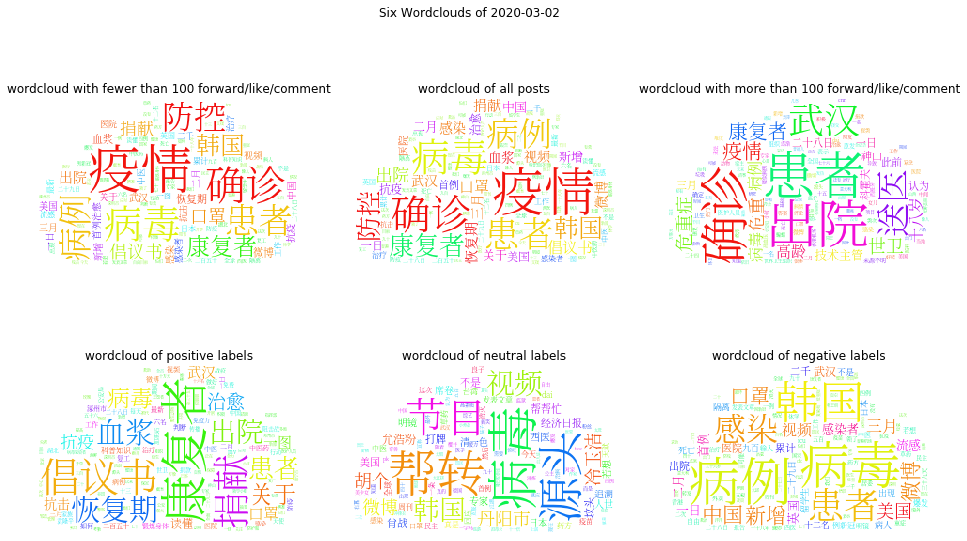

In [140]:
wc_list = df_to_six_wordcloud(df, stop_list,100,'2020-03-02')

In [320]:
import translate
import pickle


def save_obj(obj, name):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def ch_wc_to_en_wc(wc_list,date,threshold):
    eng_wc_list = []
    namelist={1:'wc_no_like', 2:'wc_all', 3:'wc_yes_like', 4:'wc_pos',5:'wc_neu', 6:'wc_neg'}
    for i in range(1,7):
        print(i)
        wc = wc_list[i-1]
        name = namelist.get(i)
        if wc != None:
            eng_freq_list = {}
            for key, value in wc.words_.items():
                if key in translation_dict:
                    new_key = translation_dict.get(key)
                else:
                    new_key = translator.translate(key)
                    translation_dict[new_key] = value
                eng_freq_list[new_key] = value

#         eng_freq_list = {translator.translate(key): value for key, value in wc.words_.items()}
            save_obj(eng_freq_list, date+'-' + str(name)+ '_eng_freq_list')
            en_wc = eng_wordcloud(eng_freq_list)
            eng_wc_list.append(en_wc)
        else:
            eng_wc_list.append(None)
#         return en_wc

    fig, axs = plt.subplots(2, 3, figsize=(16,9))
    [axi.set_axis_off() for axi in axs.ravel()]
    fig.suptitle('Six Wordclouds of '+ date + ' (en)')
    
    wc_no_like = eng_wc_list[0]
    wc_all = eng_wc_list[1]
    wc_yes_like = eng_wc_list[2]
    wc_pos = eng_wc_list[3]
    wc_neu = eng_wc_list[4]
    wc_neg = eng_wc_list[5]
    
    
    if wc_yes_like != None:
        axs[0, 2].imshow(wc_yes_like)
        axs[0, 2].set_title('wordcloud with more than '+str(threshold)+' forward/like/comment')
    else: 
        axs[0, 2].axis('off')
        

    axs[0, 0].imshow(wc_no_like)
    axs[0, 0].set_title('wordcloud with fewer than '+str(threshold)+' forward/like/comment')
    axs[0, 1].imshow(wc_all)
    axs[0, 1].set_title('wordcloud of all posts')
    
    axs[1, 0].imshow(wc_pos)
    axs[1, 0].set_title('wordcloud of positive labels')
    axs[1, 1].imshow(wc_neu)
    axs[1, 1].set_title('wordcloud of neutral labels')
    axs[1, 2].imshow(wc_neg)
    axs[1, 2].set_title('wordcloud of negative labels')
    
    fig.savefig('wordcloud/' + date + '-en.png')
    
    

    

In [360]:
# script to use translate api and save to local 

import translate
import pickle


def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
# save_obj(word_list, 'word_list')
word_list = load_obj('word_list')

    
translator= translate.Translator(from_lang = "zh", to_lang="en")

translation_dict = {}
chunks = [word_list[x:x+100] for x in range(0, len(word_list), 100)]


for i in range(len(chunks)):
    print ("Now running chunk "+ str(i))
    translation_dict = {}
    word_list = chunks[i]
    for word in word_list:
        word_translation = translator.translate(word)
#         print (word,word_translation)
        translation_dict[word] = word_translation
        save_obj(translation_dict, 'translation_dict_'+str(i))
 

In [142]:


def translate_to_chinese(word):
    return translator.translate(word)


# translator.translate("患者").text
temp_dict = {'疫情': 0.14672284824293882,
 '确诊': 0.07652331811941447,
 '防控': 0.06132467114287303,
 '患者': 0.0476524567456828,
 '护士': 0.04276302999651941}

translator= translate.Translator(from_lang = "zh", to_lang="en")

eng_freq_list = {translator.translate(key): value for key, value in wc.words_.items()}

## main script to generate ch and en wordclouds

In [ ]:
translator = translate.Translator(from_lang = "zh", to_lang="en")
translation_dict = translation_dict
stoplist = ['新型','肺炎','新冠','冠状病毒','展开','全文','什么']
threshold = 100
for df in df_list:
    df['label'] = df['predict']
    date = (df['date'][0])
    ch_wc_list = df_to_six_wordcloud(df, stop_list,threshold,date)
    ch_wc_to_en_wc(ch_wc_list,date,threshold)
    print (date + " is finished")